File patch to address GitHub rendering issue by fixing widget metadata structure (added missing 'state' parameter).

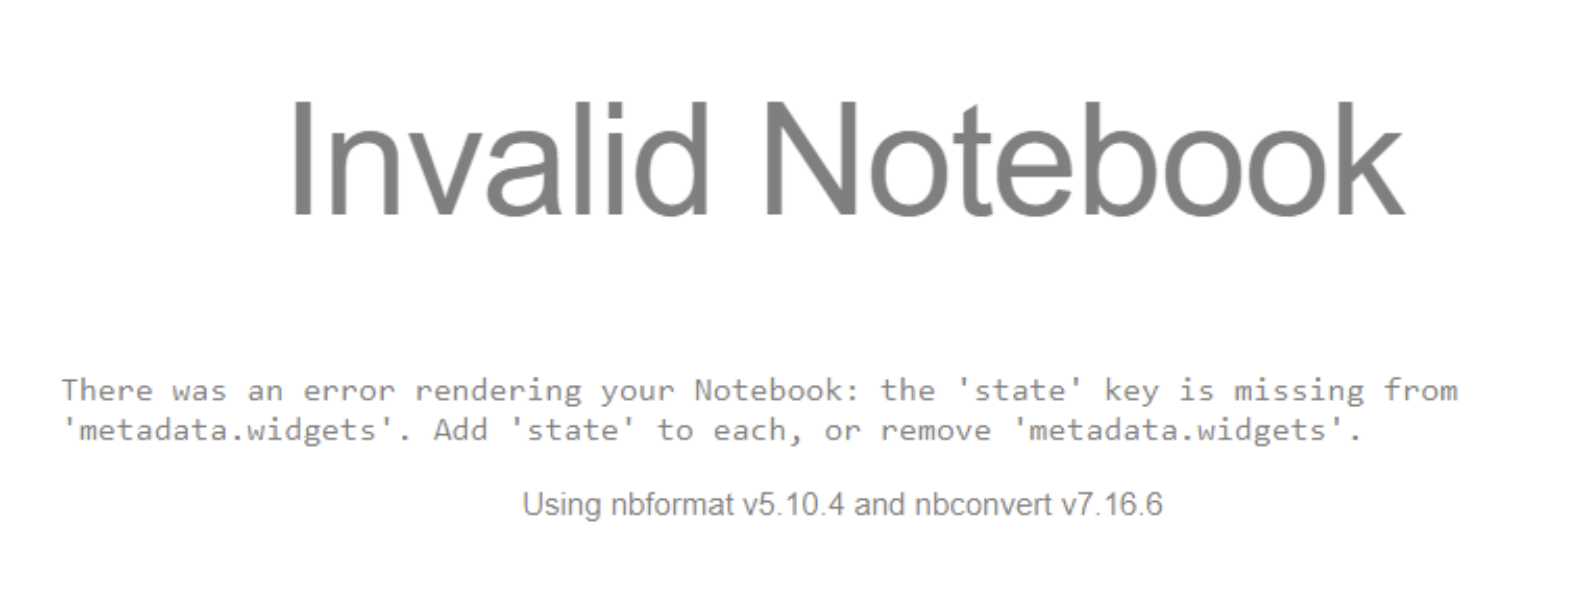

The problem occurs when an .ipynb file is created in Google Colab and saved directly to GitHub, resulting in rendering issues due to incorrect widget metadata.

To fix this, I downloaded the problematic .ipynb file, placed it in my local Jupyter Notebook environment, and ran this script to fix the widget metadata. Afterward, I uploaded the corrected file back to GitHub, and it rendered correctly.

In [ ]:
import nbformat


path = "Multilingual_NER_head_2.ipynb"

# Load the notebook
with open(path, "r", encoding="utf-8") as f:
    nb = nbformat.read(f, as_version=4)

widgets_meta = nb.metadata.get("widgets", {})

widgets_meta

In [23]:
# Access the widgets metadata
widget_json = widgets_meta.get("application/vnd.jupyter.widget-state+json", {})

# If "state" is not present, move the widget IDs into "state"
if "state" not in widget_json:
    state = {}
    version_keys = {}
    for k, v in list(widget_json.items()):
        if k.startswith("version_"):
            version_keys[k] = v
        else:
            state[k] = v
            del widget_json[k]
    widget_json["state"] = state
    widget_json.update(version_keys)

In [ ]:
widget_json

In [24]:
# Save the fixed notebook
with open(path, "w", encoding="utf-8") as f:
    nbformat.write(nb, f)

print(f"Widget metadata fixed. The notebook has been updated: {path}")

Widget metadata fixed. The notebook has been updated: Multilingual_NER_head_2.ipynb
